In [ ]:
import numpy as np
np.random.seed(0)
import torch
torch.manual_seed(0)
import random
random.seed(0)
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Module
import cv2
import os
import torchvision
import matplotlib.pyplot as plt 
from PIL import Image
from keras import backend as K


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


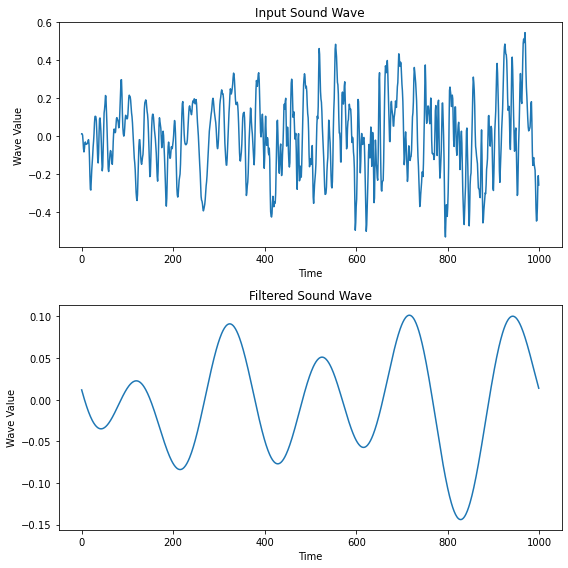

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Wave Value')

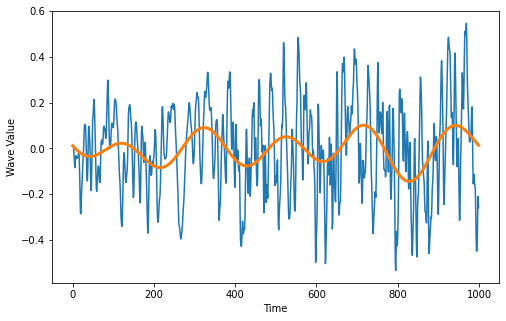

In [ ]:
input_audio_filename = "../Datasets/Filtering/audio.npy"
input_audio_filename = "audio.npy"

# LOAD input_audio FROM input_audio_filename
input_audio = np.load(input_audio_filename)


def highpass_filter_audio(audio):
    # IMPLEMENT THIS FUNCTION

    # FFT of the audio file
    audiofft = np.fft.fft(audio)
    power = np.abs(audiofft)**2

    # corresponding freq
    time_step = 1
    sample = np.fft.fftfreq(audio.size, d=time_step)

    # passing only positive values
    passed = np.where(sample > 0)
    freqs = sample[passed]
    peak = freqs[power[passed].argmax()]

    # compare the waves from the original fft audio
    high_freq_fft = audiofft.copy()
    high_freq_fft[np.abs(sample) > peak] = 0
    # re-create the wave format 
    filtered_audio = np.fft.ifft(high_freq_fft)

    return filtered_audio

# compute
filtered_audio = highpass_filter_audio(input_audio)

# for plotting
time = [i for i in range(input_audio.shape[0])]

# plotting the input and output
fig, axis = plt.subplots(2, 1, figsize = (8,8))
plt.subplot(2, 1, 1)
plt.title("Input Sound Wave") 
plt.xlabel("Time") 
plt.ylabel("Wave Value") 
plt.plot(time, input_audio) 
plt.subplot(2, 1, 2)
plt.title("Filtered Sound Wave") 
plt.xlabel("Time") 
plt.ylabel("Wave Value") 
plt.plot(time, filtered_audio) 
plt.tight_layout()
plt.show()

# plotting over eachother
plt.figure(figsize=(8, 5))
plt.plot(time, input_audio)
plt.plot(time, filtered_audio, linewidth=3)
plt.xlabel('Time')
plt.ylabel('Wave Value')
